In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("4u1728_burstdata.txt").flatten()

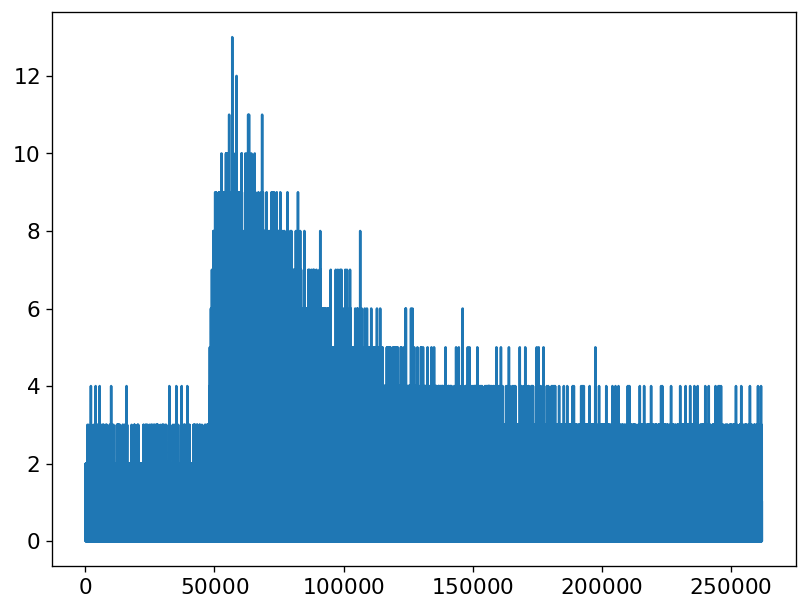

In [3]:
fig, ax = plt.subplots()
ax.plot(data)

In [4]:
len(data)

262144

In [5]:
b = data.reshape(1024, 256)

In [6]:
data.shape

(262144,)

In [7]:
binned_data = b.sum(axis=1)

In [8]:
binned_data

array([59., 74., 91., ..., 86., 93., 93.])

In [9]:
len(binned_data)

1024

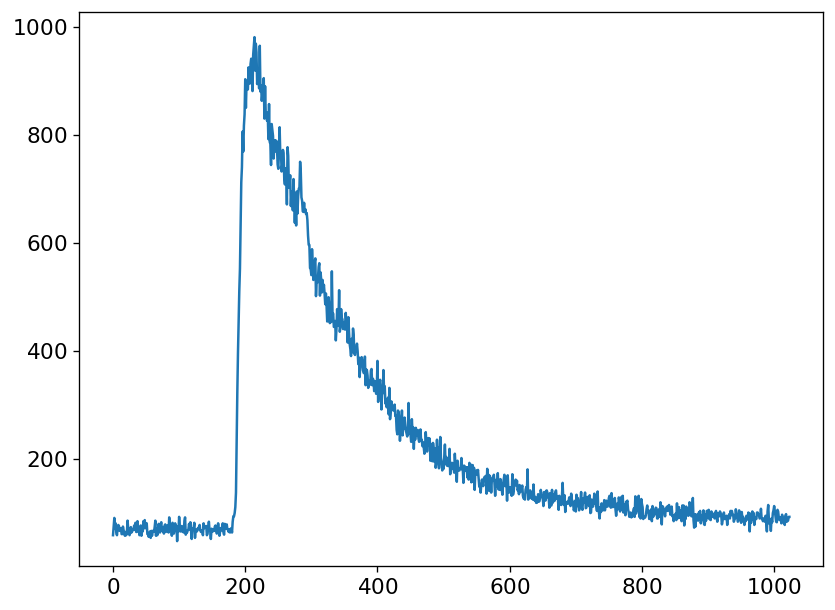

In [10]:
fig, ax = plt.subplots()
ax.plot(binned_data)

In [11]:
c_k = np.fft.rfft(data)
print(c_k)
len(c_k)

[ 2.31976000e+05     +0.j         -3.94319683e+04-100787.11355492j
 -7.12973272e+04 +24288.56294696j ... -7.52997495e+01   +325.24519192j
  2.32515549e+02   -445.25267508j -5.26000000e+02     +0.j        ]


131073

In [20]:
N = len(data)
T = 32.0
kfreq = np.fft.rfftfreq(N) * N / T

(200, 400)

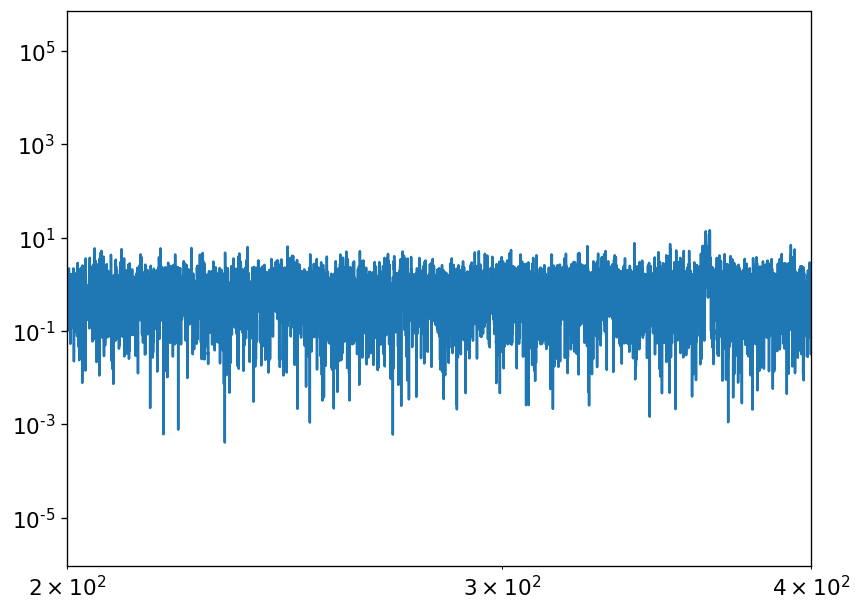

In [42]:
fig, ax = plt.subplots()
ax.plot(kfreq, np.abs(c_k)**2 / N)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(200, 400)

In [46]:
c_k_binned = np.abs(c_k[1:]).reshape(int(len(c_k)/8), 8).mean(axis=1)
kfreq_binned = kfreq[1:].reshape(int(len(kfreq)/8), 8).mean(axis=1)

In [47]:
c_k_binned

array([46521.18123745, 11948.28893321,  5526.84250241, ...,
         390.00094306,   330.94328011,   325.59832782])

(0.0, 20.0)

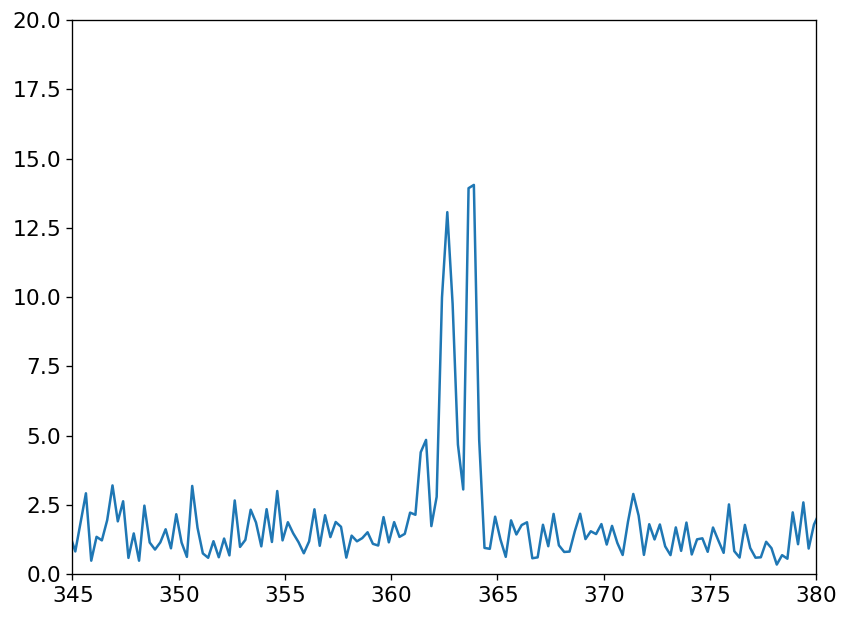

In [52]:
fig, ax = plt.subplots()
ax.plot(kfreq_binned, c_k_binned**2 * 2 / N)

ax.set_xlim(345, 380)
ax.set_ylim(0, 20)